## Task 1: Import datasets

In [1]:
# Importing pandas
# ... YOUR CODE FOR TASK 1 ...
import pandas as pd

# Reading in the data
df = pd.read_csv("datasets/cookie_cats.csv")

# Showing the first few rows
# ... YOUR CODE FOR TASK 1 ...
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


## Task 2: Examine AB Test Data

In [2]:
# Counting the number of players in each AB group.
df.groupby(['version']).count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


## Task 3: Distribution of Game Rounds

Text(0, 0.5, 'User Count')

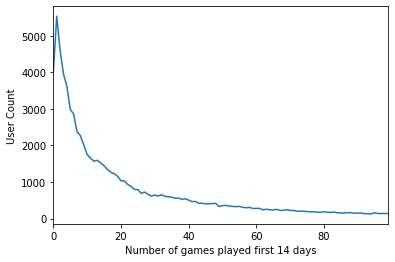

In [3]:
# This command makes plots appear in the notebook
%matplotlib inline

# Counting the number of players for each number of gamerounds 
plot_df = df.groupby('sum_gamerounds')['userid'].count()

# Plotting the distribution of players that played 0 to 100 game rounds
ax = plot_df.head(100).plot(x='sum_gamerounds', y = 'userid')
ax.set_xlabel("Number of games played first 14 days")
ax.set_ylabel("User Count")

## Task 4: 1 Day Retention Proportion

In [4]:
# The % of users that came back the day after they installed
# ... YOUR CODE FOR TASK 4 ...
df['retention_1'].mean()

0.4452095044850259

## Task 5: 1 Day Retention by Version

In [5]:
# Calculating 1-day retention for each AB-group
# ... YOUR CODE FOR TASK 5 ...
df.groupby('version')['retention_1'].mean()

version
gate_30    0.448188
gate_40    0.442283
Name: retention_1, dtype: float64

Task 6

Task 7

Task 8